In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

pd.set_option('notebook_repr_html',False)
pd.set_option('max_columns',30)
pd.set_option('max_rows',20)

We first need to clean up the ACS Social csv file before merging with COVID data.

In [4]:
social=pd.read_csv("../../../../data/stage_1/ACS Social.csv")

#countyFIPS in COVID data only goes up to 5 numbers, so we only need the last 5 characters
social['countyFIPS']=social['countyFIPS'].str[-5:]

#Changing it to numeric removes the leading zeros, which aren't in the COVID data
social['countyFIPS'] = pd.to_numeric(social['countyFIPS'])

social

     countyFIPS                           County Name  No Diploma  \
0          1003               Baldwin County, Alabama     12068.0   
1          1015               Calhoun County, Alabama      8871.0   
2          1043               Cullman County, Alabama      8365.0   
3          1049                DeKalb County, Alabama      5375.0   
4          1051                Elmore County, Alabama      3853.0   
..          ...                                   ...         ...   
835       72113          Ponce Municipio, Puerto Rico         NaN   
836       72127       San Juan Municipio, Puerto Rico         NaN   
837       72135       Toa Alta Municipio, Puerto Rico         NaN   
838       72137       Toa Baja Municipio, Puerto Rico         NaN   
839       72139  Trujillo Alto Municipio, Puerto Rico         NaN   

     High School  Associate's  Bachelor's  Graduate  Foreign Born  
0        41884.0      16170.0     32781.0   18690.0       11002.0  
1        27277.0       7112.0      

Now let's do the same for Economic data

In [5]:
economic=pd.read_csv("../../../../data/stage_1/ACS Economic.csv")

#countyFIPS in COVID data only goes up to 5 numbers, so we only need the last 5 characters
economic['countyFIPS']=economic['countyFIPS'].str[-5:]

#Changing it to numeric removes the leading zeros, which aren't in the COVID data
economic['countyFIPS'] = pd.to_numeric(economic['countyFIPS'])

economic

     countyFIPS                           County Name  Less than $10,000  \
0          1003               Baldwin County, Alabama               4068   
1          1015               Calhoun County, Alabama               4307   
2          1043               Cullman County, Alabama               1410   
3          1049                DeKalb County, Alabama               1790   
4          1051                Elmore County, Alabama                877   
..          ...                                   ...                ...   
835       72113          Ponce Municipio, Puerto Rico              19155   
836       72127       San Juan Municipio, Puerto Rico              40451   
837       72135       Toa Alta Municipio, Puerto Rico               4554   
838       72137       Toa Baja Municipio, Puerto Rico               6318   
839       72139  Trujillo Alto Municipio, Puerto Rico               3795   

     $10,000 to $14,999  $15,000 to $24,999  $25,000 to $34,999  \
0                  3

Time to pull in the previously merged COVID data from the team task

In [6]:
covid_data=pd.read_csv("../../../../data/stage_1/superdataset.csv")
covid_data

         countyFIPS            County_Name State        Date  Confirmed  \
0                 0  statewide unallocated    AL  2020-01-22          0   
1                 0  statewide unallocated    AL  2020-01-23          0   
2                 0  statewide unallocated    AL  2020-01-24          0   
3                 0  statewide unallocated    AL  2020-01-25          0   
4                 0  statewide unallocated    AL  2020-01-26          0   
...             ...                    ...   ...         ...        ...   
2346471       56045          weston county    WY  2022-02-03       1491   
2346472       56045          weston county    WY  2022-02-04       1496   
2346473       56045          weston county    WY  2022-02-05       1496   
2346474       56045          weston county    WY  2022-02-06       1496   
2346475       56045          weston county    WY  2022-02-07       1508   

         Deaths  population  
0             0           0  
1             0           0  
2        

Before merging with the social and economic data sets, let's first see how Indiana is doing regarding COVID cases.

In [7]:
indiana_covid = covid_data[covid_data["State"].isin(["IN"])]
indiana_covid.head()

        countyFIPS            County_Name State        Date  Confirmed  \
522852           0  statewide unallocated    IN  2020-01-22          0   
522853           0  statewide unallocated    IN  2020-01-23          0   
522854           0  statewide unallocated    IN  2020-01-24          0   
522855           0  statewide unallocated    IN  2020-01-25          0   
522856           0  statewide unallocated    IN  2020-01-26          0   

        Deaths  population  
522852       0           0  
522853       0           0  
522854       0           0  
522855       0           0  
522856       0           0  

We use the datetime function to ensure that the dates are in the right format in the file.

In [8]:
from datetime import datetime
pd.to_datetime(indiana_covid.Date)

522852   2020-01-22
522853   2020-01-23
522854   2020-01-24
522855   2020-01-25
522856   2020-01-26
            ...    
592411   2022-02-03
592412   2022-02-04
592413   2022-02-05
592414   2022-02-06
592415   2022-02-07
Name: Date, Length: 69564, dtype: datetime64[ns]

This is grabbing the COVID-19 cases for each of the last 7 days of the data. 

In [9]:
first_day=indiana_covid.loc[indiana_covid['Date'] =="2022-02-01"]
first_day.head()
second_day=indiana_covid.loc[indiana_covid['Date'] =="2022-02-02"]
third_day=indiana_covid.loc[indiana_covid['Date'] =="2022-02-03"]
fourth_day=indiana_covid.loc[indiana_covid['Date'] =="2022-02-04"]
fifth_day=indiana_covid.loc[indiana_covid['Date'] =="2022-02-05"]
sixth_day=indiana_covid.loc[indiana_covid['Date'] =="2022-02-06"]
seventh_day=indiana_covid.loc[indiana_covid['Date'] =="2022-02-07"]
seventh_day.head()

        countyFIPS            County_Name State        Date  Confirmed  \
523599           0  statewide unallocated    IN  2022-02-07          0   
524347       18001           adams county    IN  2022-02-07       7509   
525095       18003           allen county    IN  2022-02-07     101761   
525843       18005     bartholomew county    IN  2022-02-07      20773   
526591       18007          benton county    IN  2022-02-07       2410   

        Deaths  population  
523599       0           0  
524347     107       35777  
525095    1094      379299  
525843     233       83779  
526591      21        8748  

This is summing all of the data for each day.

In [15]:
indiana_sums=pd.DataFrame(columns=['2022-02-01','2022-02-02','2022-02-03','2022-02-04','2022-02-05','2022-02-06','2022-02-07'])
indiana_sums=indiana_sums.append({"2022-02-01":first_day["Confirmed"].sum(),"2022-02-02":second_day["Confirmed"].sum(),"2022-02-03":third_day["Confirmed"].sum(),"2022-02-04":fourth_day["Confirmed"].sum(),"2022-02-05":fifth_day["Confirmed"].sum(),"2022-02-06":sixth_day["Confirmed"].sum(),"2022-02-07":seventh_day["Confirmed"].sum()},ignore_index=True)
indiana_sums

  2022-02-01 2022-02-02 2022-02-03 2022-02-04 2022-02-05 2022-02-06 2022-02-07
0    1633264    1640178    1646804    1651124    1651124    1651124    1656178

Now let's plot our data in a line graph.

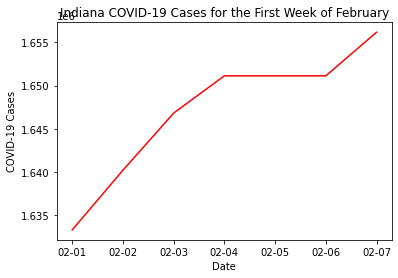

In [11]:
dates=pd.Series(['02-01','02-02','02-03','02-04','02-05','02-06','02-07'])
cases=pd.Series([1633264,1640178,1646804,1651124,1651124,1651124,1656178])
plt.title("Indiana COVID-19 Cases for the First Week of February")
plt.xlabel("Date")
plt.ylabel("COVID-19 Cases")
plt.plot(dates,cases, color ="red")
plt.show()

The graph above is showing that COVID-19 cases are increasing in a uniform manner. While 02-04 to 02-06 show no increases in cases, those days also fall on a weekend, so we cannot rule out underreporting for those days. As such, I would say that COVID-19 cases in Indiana are increasing. But what about deaths?

In [16]:
indiana_death_sums=pd.DataFrame(columns=['2022-02-01','2022-02-02','2022-02-03','2022-02-04','2022-02-05','2022-02-06','2022-02-07'])
indiana_death_sums=indiana_death_sums.append({"2022-02-01":first_day["Deaths"].sum(),"2022-02-02":second_day["Deaths"].sum(),"2022-02-03":third_day["Deaths"].sum(),"2022-02-04":fourth_day["Deaths"].sum(),"2022-02-05":fifth_day["Deaths"].sum(),"2022-02-06":sixth_day["Deaths"].sum(),"2022-02-07":seventh_day["Deaths"].sum()},ignore_index=True)
indiana_death_sums

  2022-02-01 2022-02-02 2022-02-03 2022-02-04 2022-02-05 2022-02-06 2022-02-07
0      21487      21598      21666      21712      21712      21712      21812

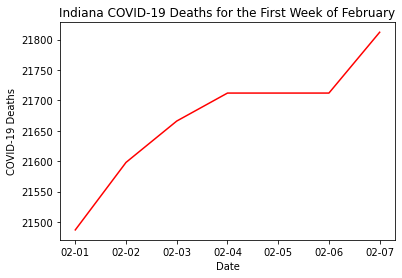

In [17]:
dates=pd.Series(['02-01','02-02','02-03','02-04','02-05','02-06','02-07'])
cases=pd.Series([21487,21598,21666,21712,21712,21712,21812])
plt.title("Indiana COVID-19 Deaths for the First Week of February")
plt.xlabel("Date")
plt.ylabel("COVID-19 Deaths")
plt.plot(dates,cases, color ="red")
plt.show()

As you can see, the trend is essentially identical to the confirmed cases, just with far lower numbers. 

Now let's try merging the Social and Economic data with the COVID data.

In [12]:
social_covid=pd.merge(covid_data,social)
complete_data=pd.merge(social_covid,economic)
#Removing County Name because it is a duplicate column
complete_data=complete_data.drop(["County Name"], axis=1)
complete_data

        countyFIPS     County_Name State        Date  Confirmed  Deaths  \
0             1003  baldwin county    AL  2020-01-22          0       0   
1             1003  baldwin county    AL  2020-01-23          0       0   
2             1003  baldwin county    AL  2020-01-24          0       0   
3             1003  baldwin county    AL  2020-01-25          0       0   
4             1003  baldwin county    AL  2020-01-26          0       0   
...            ...             ...   ...         ...        ...     ...   
606623       56025  natrona county    WY  2022-02-03      21413     255   
606624       56025  natrona county    WY  2022-02-04      21501     255   
606625       56025  natrona county    WY  2022-02-05      21501     255   
606626       56025  natrona county    WY  2022-02-06      21501     255   
606627       56025  natrona county    WY  2022-02-07      21596     255   

        population  No Diploma  High School  Associate's  Bachelor's  \
0           223234     1206

As we can see, we have far fewer rows than before. This is because the inner join removed all of the "Statewide unallocated" rows that we did not want in the complete dataset anyway. The data from all three sources has now been merged into one large enrichment data source.

In [ ]:
complete_data.to_csv('../../../../data/stage_1/ACS_Economic_Social_Merged.csv',index = False)

We have saved the data as a CSV file.